<a href="https://colab.research.google.com/github/thehyperpineapple/FaceDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inital Setup and Data Collection

### - Installing required libraries

In [ ]:
# !pip install labelme tensorflow-gpu opencv-python matplotlib albumentations

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import albumentations as alb
import cv2
import random

### - Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### - Make image & label loading function


In [2]:
def load_image(path):
  image_byte = tf.io.read_file(path) #returns as byte data
  img = tf.io.decode_jpeg(image_byte) #returns image
  return img 

In [3]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### - Viewing Raw Images

In [ ]:
image_gen = images.batch(4).as_numpy_iterator()
# the batch() function is used to return multiple images rather than just 1
# Here we are visualising 4

In [ ]:
plot_img = image_gen.next()

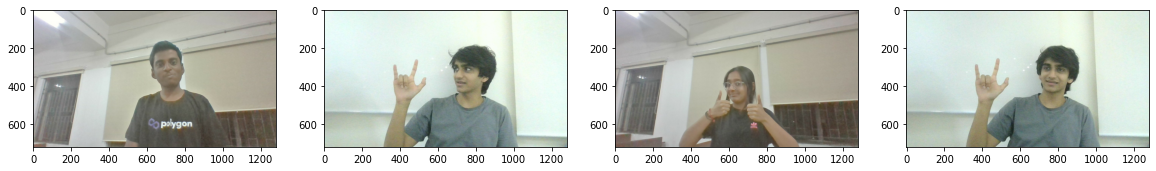

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Creates figure and a set of 4 subplots with size 20x20 inches
for idx, image in enumerate(plot_img):
  ax[idx].imshow(image)
plt.show()

### - Data Augumentation

In [ ]:
# Setting various augumentations

augmentation = alb.Compose([
                          alb.RandomCrop(width=450, height=450),
                          alb.HorizontalFlip(p=0.5),
                          alb.RandomBrightnessContrast(p=0.2),
                          alb.RandomGamma(p=0.2),
                          alb.RGBShift(p=0.2),
                          alb.VerticalFlip(p=0.5)], 
                          bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))

### - Load a test image and annotation with OpenCV and JSON

In [ ]:
img = cv2.imread(os.path.join('drive','MyDrive','Project AIML','train','images','Raghav (1).jpg'))
img.shape

(720, 1080, 3)

In [ ]:
with open(os.path.join('drive','MyDrive','Project AIML','train','labels','Raghav (1).json'), 'r') as f:
        label = json.load(f)

In [ ]:
label['shapes'][0]['points']

[[382.39130434782606, 31.739130434782652],
 [689.6376811594203, 377.39130434782606]]

In [ ]:
coordinates = [0,0,0.0001,0.0001]
coordinates[0] = label['shapes'][0]['points'][0][0] # x-min
coordinates[1] = label['shapes'][0]['points'][0][1] # y-min
coordinates[2] = label['shapes'][0]['points'][1][0] # x-max
coordinates[3] = label['shapes'][0]['points'][1][1] # y-max
coordinates

[382.39130434782606, 31.739130434782652, 689.6376811594203, 377.39130434782606]

In [ ]:
# For normalization

if img.shape == (720,1280,3): # height, width
  coordinates = list(np.divide(coordinates, [1280,720,1280,720])) # width,height,width,height
elif img.shape == (720,1080,3): # height, width
  coordinates = list(np.divide(coordinates, [1080,720,1080,720])) # width,height,width,height
elif img.shape == (3072, 4080, 3):
  coordinates = list(np.divide(coordinates, [4080,3072,4080,3072])) # width,height,width,height

coordinates

[0.3540660225442834,
 0.04408212560386479,
 0.6385534084809447,
 0.5241545893719807]

In [ ]:
augmented_image = augmentation(image = img, bboxes=[coordinates], class_labels=['Raghav'])

In [ ]:
augmented_image['class_labels']

['Raghav']

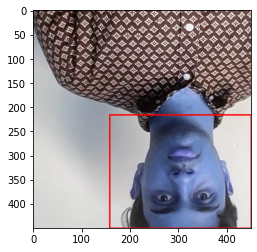

In [ ]:
cv2.rectangle(augmented_image['image'], 
              tuple(np.multiply(augmented_image['bboxes'][0][:2], [450,450]).astype(int)), #top coordinate, x-max and y-max
              tuple(np.multiply(augmented_image['bboxes'][0][2:], [450,450]).astype(int)), #bottom coordinate, x-min and y-min
                    (255,0,0), 2)

plt.imshow(augmented_image['image'])

#### - Augmentation Pipeline

In [ ]:
# Iterating through the images

for partition in ['train','test','validation']:
  for image in os.listdir(os.path.join(partition,'images')):
    img = cv2.imread(os.path.join(partition, 'images', image))

    coordinates = [0,0,0.0001,0.0001]
    label_path = os.path.join(partition,'labels',f'{image.split(".")[0]}.json')

    if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
              
            
            coordinates[0] = label['shapes'][0]['points'][0][0] # x-min
            coordinates[1] = label['shapes'][0]['points'][0][1] # y-min
            coordinates[2] = label['shapes'][0]['points'][1][0] # x-max
            coordinates[3] = label['shapes'][0]['points'][1][1] # y-max

            if img.shape == (720,1280,3): # height, width
              coordinates = list(np.divide(coordinates, [1280,720,1280,720])) # width,height,width,height
            elif img.shape == (720,1080,3): # height, width
              coordinates = list(np.divide(coordinates, [1080,720,1080,720])) # width,height,width,height
            elif img.shape == (3072, 4080, 3):
              coordinates = list(np.divide(coordinates, [4080,3072,4080,3072])) # width,height,width,height
            print(coordinates)
    final_label = label['shapes'][0]['label']
    legend_dict = { 0: 'Ansh', 
                    1: 'Anushk', 
                    2: 'Archit', 
                    3: 'Nimisha', 
                    4: 'Priyanshi', 
                    5: 'Raghav', 
                    6: 'Srivatsa', 
                    7: 'Tanisha', 
                    8: 'Tarran', 
                    9: 'Vanya'}


    key_list = list(legend_dict.keys())
    val_list = list(legend_dict.values())

    for value in val_list:
      if final_label == value:
          final_label = key_list[val_list.index(value)]
    
    # DO NOT RUN AGAIN

    # for x in range(20):
    #     augmented_image = augmentation(image=img, bboxes=[coordinates], class_labels=[final_label])
    #     cv2.imwrite(os.path.join('augumented_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented_image['image'])

    #     annotation = {}
    #     annotation['image'] = image

    #     if os.path.exists(label_path):
    #         if len(augmented_image['bboxes']) == 0: 
    #             annotation['bbox'] = [0,0,0,0]
    #             annotation['class'] = 0 
    #         else: 
    #             annotation['bbox'] = augmented_image['bboxes'][0]
    #             annotation['class'] = final_label
    #     else: 
    #         annotation['bbox'] = [0,0,0,0]
    #         annotation['class'] = 0 


    #     with open(os.path.join('augumented_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
    #         json.dump(annotation, f)
    # print('Success' + final_label)

Load Augumented Images and Labels to the Tensorflow Dataset

In [4]:
train_images = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/augmented_data/train/images/*.jpg", shuffle=False) 
# Takes images from respective folder. Shuffle is false as we need to load labels in the same order
train_images = train_images.map(load_image)
# Loading the image
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120))) # Resizing it to 120 x 120 to make the Neural Network more efficient as less data is parsed
train_images = train_images.map(lambda x: x/255) #Normalizing values to use a sigmoid activation function as values will be between 0 and 1

train_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/augmented_data/train/labels/*.json", shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [5]:
test_images = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/augmented_data/test/images/*jpg", shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)



test_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/augmented_data/test/labels/*.json", shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [6]:
val_images = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/augmented_data/validation/images/*.jpg", shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)



val_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/Project AIML/augmented_data/validation/labels/*.json", shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [19]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8),
 array([0.4666, 0.3328, 0.6294, 0.6704], dtype=float16))

### Combine Label and Image Samples

In [8]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1680, 1680, 500, 500, 560, 560)

In [45]:
# Combines images and labels
# Shuffle with a size bigger than the dataset size, with a batch of 8 
# While the model is executing training step s, the input pipeline is reading the data for step s+1. Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

# Training
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(2500)
train = train.batch(8)
# train = train.prefetch(4)

# Testing

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(2500)
test = test.batch(8)
test = test.prefetch(4)

# Validation
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(2500)
val = val.batch(8)
val = val.prefetch(4)

In [34]:
data_samples = train.as_numpy_iterator()

In [ ]:
# train.as_numpy_iterator().next()[1] #First array consists of classification output, Second array consists of the regression (bounding box) output

In [35]:
res = data_samples.next()

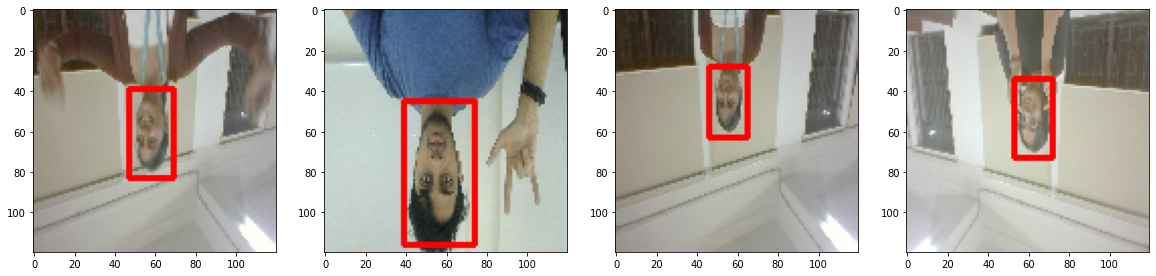

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

### DL using API

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

# VGG16 is used for base architecture and then prediction layers are added
# Functional API is used to have 2 loss functions, one for classification and one for regression, which will be added in the end

In [9]:
vgg = VGG16(include_top=False) # We need to add our own layers

58889256/58889256 [==============================] - 3s 0us/step


In [10]:
def build_model(): # Instantiate model
  input_layer = Input(shape=(120,120,3))

  vgg = VGG16(include_top=False)(input_layer)

  # Classification  
  f1 = GlobalMaxPooling2D()(vgg)
  class_1 = Dense(2048, activation='relu')(f1)
  class_2 = Dense(1, activation='sigmoid')(class_1)

  # Regression bounding box
  f2 = GlobalMaxPooling2D()(vgg)
  regress_1 = Dense(2048, activation='relu')(f2)
  regress_2 = Dense(4, activation='sigmoid')(regress_1)

  facetracker = Model(inputs=input_layer, outputs=[class_2, regress_2])
  return facetracker

### Testing Model

In [69]:
facetracker = build_model()
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_4[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

### Define Loss & Optimizer functions

In [70]:
 # Slow down learning rate to avoid overfitting and blowing up of gradients
 
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch # How much LR will drop each epoch

In [71]:
# Optimiser function
opt = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001, decay = lr_decay)

In [72]:
# Localization loss for regression model. Refer formula

def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

# Classification Loss
classification_loss = tf.keras.losses.CategoricalCrossentropy()
regression_loss = localization_loss

### Model Piepline

In [73]:
class FaceTracker(Model): 
    def __init__(self, facetracker,  **kwargs): # Pass through initial parameters
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classification_loss, localization_loss, **kwargs): # Pass through self, optimisers and loss functions
        super().compile(**kwargs)
        self.closs = classification_loss
        self.lloss = localization_loss
        
        # Define the accuracy metric
        self.accuracy = tf.keras.metrics.CategoricalAccuracy(name='accuracy')
    
    def train_step(self, batch, **kwargs): 
        
        x, y = batch # Unpack into x and y values. x being pre-processed images, y being label
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(x, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables)) # Apply one step of gradient descent
        
        # Update the accuracy metric
        self.accuracy.update_state(y[0], classes)
        
        # Return a dictionary of metrics
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss, "accuracy": self.accuracy.result()}
    
    def test_step(self, batch, **kwargs): 
        x, y = batch
        
        classes, coords = self.model(x, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        # Update the accuracy metric
        self.accuracy.update_state(y[0], classes)
        
        # Return a dictionary of metrics
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss, "accuracy": self.accuracy.result()}
        
    def call(self, x, **kwargs): 
        return self.model(x, **kwargs)


In [74]:
model = FaceTracker(facetracker)

In [75]:
model.compile(opt, classification_loss, regression_loss)

### Starting Training the model

In [76]:
logdir='logs'

In [77]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
210/210 [==============================] - 51s 106ms/step - total_loss: 0.1561 - class_loss: 5.6695e-07 - regress_loss: 0.1561 - accuracy: 1.0000 - val_total_loss: 0.0573 - val_class_loss: 4.6194e-07 - val_regress_loss: 0.0573 - val_accuracy: 1.0000
Epoch 2/10
210/210 [==============================] - 49s 107ms/step - total_loss: 0.0179 - class_loss: 5.6582e-07 - regress_loss: 0.0179 - accuracy: 1.0000 - val_total_loss: 0.0385 - val_class_loss: 3.7253e-07 - val_regress_loss: 0.0385 - val_accuracy: 1.0000
Epoch 3/10
210/210 [==============================] - 46s 102ms/step - total_loss: 0.0078 - class_loss: 5.6617e-07 - regress_loss: 0.0078 - accuracy: 1.0000 - val_total_loss: 0.0202 - val_class_loss: 4.7684e-07 - val_regress_loss: 0.0202 - val_accuracy: 1.0000
Epoch 4/10
210/210 [==============================] - 48s 105ms/step - total_loss: 0.0048 - class_loss: 5.6561e-07 - regress_loss: 0.0048 - accuracy: 1.0000 - val_total_loss: 0.0172 - val_class_loss: 5.3644e-07 - val_

In [79]:
hist.history

{'total_loss': [0.025570441037416458,
  0.008093640208244324,
  0.0065788384526968,
  0.004041085485368967,
  0.0015333229675889015,
  0.003977591171860695,
  0.0010970011353492737,
  0.001195924123749137,
  0.0006048436043784022,
  0.0009746748255565763],
 'class_loss': [7.152558509915252e-07,
  4.768372150465439e-07,
  5.51343077859201e-07,
  4.321337314650009e-07,
  4.47034921080558e-07,
  4.023314090773056e-07,
  6.258488838284393e-07,
  6.109477226345916e-07,
  5.364419166653533e-07,
  5.662442390530487e-07],
 'regress_loss': [0.025570083409547806,
  0.008093401789665222,
  0.006578562781214714,
  0.004040869418531656,
  0.0015330994501709938,
  0.003977390006184578,
  0.0010966882109642029,
  0.001195618649944663,
  0.000604575383476913,
  0.0009743917034938931],
 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_total_loss': [0.05728716403245926,
  0.03849811479449272,
  0.02015560306608677,
  0.017189618200063705,
  0.023702800273895264,
  0.0151968905702233

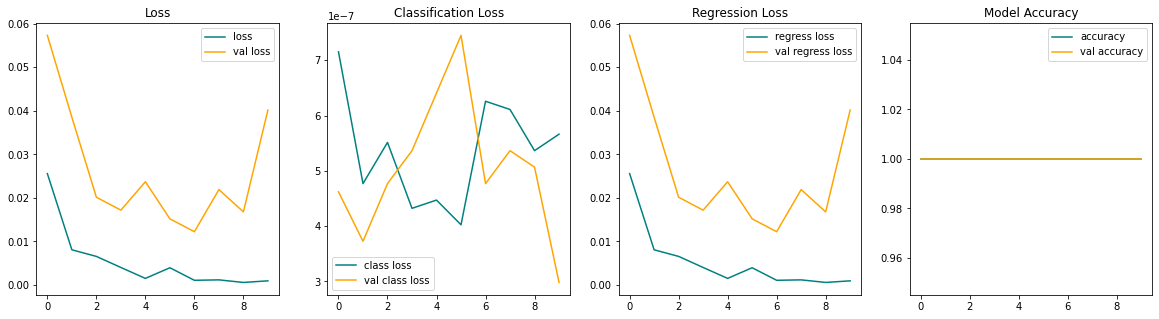

In [81]:


fig, ax = plt.subplots(ncols=4, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

ax[3].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[3].plot(hist.history['val_accuracy'], color='orange', label='val accuracy')
ax[3].title.set_text('Model Accuracy')
ax[3].legend()

plt.show()



### Predictions

In [82]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()

In [85]:
test_sample

(array([[[[0.7745098 , 0.81764704, 0.75490195],
          [0.79607844, 0.827451  , 0.76862746],
          [0.8071895 , 0.8183006 , 0.7656863 ],
          ...,
          [0.7333329 , 0.76078385, 0.7294113 ],
          [0.7558824 , 0.76960784, 0.74215686],
          [0.7349672 , 0.77418286, 0.73888874]],
 
         [[0.7735294 , 0.81666666, 0.75392157],
          [0.7745098 , 0.8215686 , 0.75686276],
          [0.78496736, 0.8163399 , 0.7575164 ],
          ...,
          [0.73692816, 0.76437914, 0.7330066 ],
          [0.75980395, 0.78333336, 0.75392157],
          [0.7281049 , 0.7751637 , 0.72026175]],
 
         [[0.779085  , 0.8153595 , 0.75490195],
          [0.76666665, 0.8156863 , 0.75      ],
          [0.7911765 , 0.8147059 , 0.75980395],
          ...,
          [0.74542475, 0.7728757 , 0.7415032 ],
          [0.75392157, 0.7754902 , 0.74607843],
          [0.7398696 , 0.77124214, 0.7124186 ]],
 
         ...,
 
         [[0.84183   , 0.86764705, 0.82385623],
          [0.83627

In [84]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 546ms/step


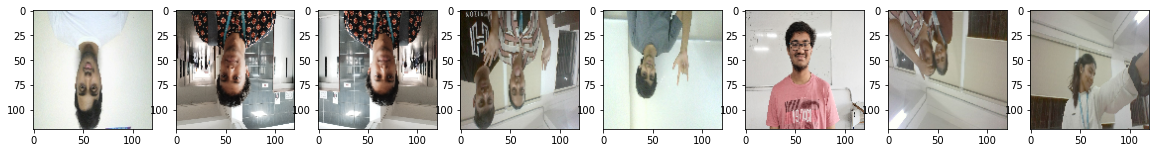

In [88]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### Saving Model

In [90]:
facetracker.save('facetracker.h5')